### Obtener los componentes principales

Un problema muy importante en el ánalisis de datos multivariantes es la reducción de la dimensionalidad, si es posible describir las p variables con la mayor precisión posible por un subconjunto r, se habra reducido la dimensionalidad a costa de una pequeña perdidad de información.

Los componentes principales son combinaciones lineales de variables estadísticas que tienen propiedades especiales en terminos de varianza. En Estadística es usado para encontrar la combinación lineal con gran varianza.

En muchos estudios exploratorios el número de variables bajo consideración es muy grande para manejarse. Ya que son las desviaciones en estos estudios lo que nos interesa, una manera de reducir el número de variables es tratar de descartar las combinaciones lineales que tienen poca varianza y estudiar únicamente aquellas con gran varianza.
La nueva variable debe tener correlación maxima con las variables originales

In [38]:
from sklearn.decomposition import PCA
import pylab as pl
import numpy as np
from scipy import linalg
from sklearn import datasets
import matplotlib as plt

El primer componente principal sera represantará como $z_1$ dado por:
$$
z_1=Xa
$$
Suponiendo que las variables originales tienen media cero, $z_1$ también y su varianza es:
$$
Var(z_1)=a_1'\mathbf{S}a_1
$$
donde S es la matriz de varianzas y covarianzas. Para maximizar la ecuación anterior supondremos que $a_1^{'}a_1=1$
Bajo esta restriccion y usando los multiplicadores de lagrange:
$$
P=a_1\mathbf{'}a_1-\lambda(a_1\mathbf{'}a_1-1)
$$
Maximizamos y encontramos que:
$$
\mathbf{S}a_1=\lambda a_1,
$$
entonces $a_1$ es un vector propio de la matriz $\mathbf{S}$, y $\lambda$ su correspondiente valor propio. Si multiplicamos por $a_1\mathbf{'}$ se concluye que $\lambda$ es la varianza de $z_1$ y su vector propio define los coeficientes del primer componente principal.

In [42]:
iris=datasets.load_iris()
print(iris.feature_names)
X=iris.data
y=iris.target
target=iris.target_names
print(target)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']


In [63]:
pca=PCA(n_components=2)
pca_coef=pca.fit(X)
print('components_')
print(pca_coef.components_) #componentes
print('Porcentaje de varianza explicada por cada componente')
print(pca_coef.explained_variance_ratio_)
print('Varianza explicada por las dos componentes')
v_e=round(sum(pca_coef.explained_variance_ratio_)*100,2)
print(v_e)


components_
[[ 0.36158968 -0.08226889  0.85657211  0.35884393]
 [ 0.65653988  0.72971237 -0.1757674  -0.07470647]]
Porcentaje de varianza explicada por cada componente
[0.92461621 0.05301557]
Varianza explicada por las dos componentes
97.76


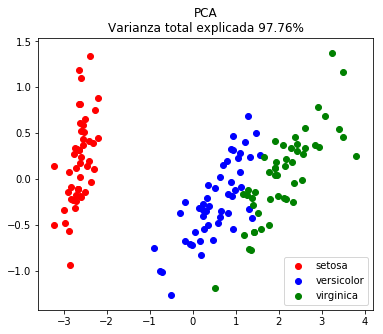

In [51]:
pca=pca.fit_transform(X)
colores=['red','blue','green']
for X_tr in [pca]:
    pl.figure(figsize=(6,5))
    for colores,i,target_names in zip(colores,[0,1,2],iris.target_names):
        pl.scatter(X_tr[y==i,0],X_tr[y==i,1],
                color=colores,label=target_names)
        pl.legend(loc="best",scatterpoints=1)
pl.title('PCA'+'\n'+'Varianza total explicada '+str(v_e)+'%')  
pl.show()        